## Build a data workflow

In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

In [3]:
# Download data on average monthly temp fro two California sites
file_url = 'https://ndownloader.figshare.com/files/21894528'
data_path = et.data.get_data(url = file_url)

data_path

# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data', 'earthpy-downloads'))

In [4]:
# List director
os.listdir(data_path)

['San-Diego', 'Sonoma']

## Exploring data using loops

In [5]:
# Print all dirs found by glob
data_dirs = os.path.join(data_path, '*')
all_dirs = glob(data_dirs)

for a_dir in all_dirs:
    print(a_dir)

C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\Sonoma


In [6]:
# Use glob inside a for loop
for a_dir in all_dirs:
    all_files = os.path.join(a_dir, '*')
    print(glob(all_files))

['C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\San-Diego\\San-Diego-1999-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\San-Diego\\San-Diego-2000-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\San-Diego\\San-Diego-2001-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\San-Diego\\San-Diego-2002-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\San-Diego\\San-Diego-2003-temp.csv']
['C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\Sonoma\\Sonoma-1999-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\Sonoma\\Sonoma-2000-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\avg-monthly-temp-fahr\\Sonoma\\Sonoma-2001-temp.csv', 'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloa

In [7]:
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, '*')
    all_file_paths = glob(dir_path)
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        print(a_file_path)
        # Read the file into a pandas dataframe and assign it to a var
        temp_data_df = pd.read_csv(a_file_path)
        
temp_data_df

C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego\San-Diego-1999-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego\San-Diego-2000-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego\San-Diego-2001-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego\San-Diego-2002-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego\San-Diego-2003-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\Sonoma\Sonoma-1999-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\Sonoma\Sonoma-2000-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\Sonoma\Sonoma-2001-temp.csv
C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\Sonoma\Sonoma-2002-temp.csv
C:\Users\user\earth-analytics\data\earthpy-

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87,83.5,85,82.7,61,56.4


### Combining pandas datasets in a list

In [8]:
all_df = []

for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, '*')
    all_file_paths = glob(dir_path)
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        #print(a_file_path)
        # Read the file into a pandas dataframe and assign it to a var
        temp_data_df = pd.read_csv(a_file_path)
        # Append the data to the list (all_df)
        all_df.append(temp_data_df)

# Combine all the dataframes and stored them into one        
pd.concat(all_df)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4


### Extracting data from pathnames

When data is stored in many directories, the name of the folder that the data is stored in can have useful infomation, such as:

1. The date that the data was collected
2. The location where the data was collected
3. Pysical attributes of the data
4. Resolution of the data

In [9]:
# Get the basename from a pathname
basename = os.path.basename(all_dirs[0])
print('the pathname without running os.path.basename(): \n', all_dirs[0])
print('\nThe information extracted from the pathname by os.path.basename():\n', basename)

the pathname without running os.path.basename(): 
 C:\Users\user\earth-analytics\data\earthpy-downloads\avg-monthly-temp-fahr\San-Diego

The information extracted from the pathname by os.path.basename():
 San-Diego


In [10]:
# Read in filenames without modifying pathnames

all_df = []
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, '*')
    all_file_paths = glob(dir_path)
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        temp_data_df = pd.read_csv(a_file_path)
        # Read the pathname from each directory into the dataframe
        # Notice that it reads the entire pathname
        temp_data_df['location'] = a_dir
        all_df.append(temp_data_df)
pd.concat(all_df)


,Year,January,February,March,April,May,June,July,August,September,October,November,December,location
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,C:\Users\user\earth-analytics\data\earthpy-dow...
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,C:\Users\user\earth-analytics\data\earthpy-dow...
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,C:\Users\user\earth-analytics\data\earthpy-dow...


In [11]:
# Read in filenames with modifying pathnames

all_df = []
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, '*')
    all_file_paths = glob(dir_path)
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        temp_data_df = pd.read_csv(a_file_path)
        # Read the pathname from each directory into the dataframe
        # Notice that it only reads the the last folder name
        temp_data_df['location'] = os.path.basename(a_dir)
        all_df.append(temp_data_df)

all_data = pd.concat(all_df)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma


### Plot temperature data
With the new column that specifies where the data was collected, you can use pandas **groupby** function to plot a chart for each location.

In [12]:
# Create a new column that contains the mean of all of the monthly reading for the average temperature in one location.
# Create a dataframe that is just the columns for temperature from each month
just_monthly_data_df = all_data.loc[:, 'January':'December']

# Get the average of each row in the dataframe and assigning the output into the new column
all_data['annual_average_temp'] = just_monthly_data_df.mean(axis = 1)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location,annual_average_temp
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego,68.258333
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego,69.308333
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego,67.641667
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego,67.958333
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego,69.408333
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma,70.241667
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma,70.258333
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma,72.025000
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma,71.491667
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma,71.625000


In [13]:
# Sort data by year for better plotting
all_data.sort_values('Year', inplace = True)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location,annual_average_temp
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego,68.258333
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma,70.241667
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego,69.308333
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma,70.258333
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego,67.641667
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma,72.025000
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego,67.958333
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma,71.491667
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego,69.408333
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma,71.625000


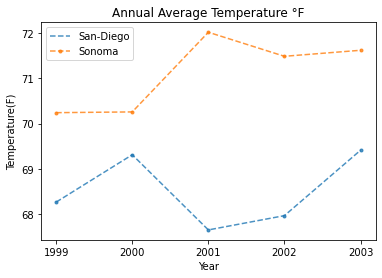

In [14]:
f, ax = plt.subplots()
for title, group in all_data.groupby('location'):
    group.groupby('location').plot(x = 'Year', y = 'annual_average_temp', 
                                  title = 'Annual Average Temperature °F', 
                                  label = title, 
                                  style = '.--', 
                                  ax = ax, 
                                  alpha = 0.8)
ax.set(xlabel = 'Year', ylabel = 'Temperature(F)', 
      xticks = [1999, 2000, 2001, 2002, 2003])
plt.show()

## Challenge: Plot temperature by maximum value

In [15]:
# Create a new column that contains the mean of all of the monthly reading for the average temperature in one location.
# Create a dataframe that is just the columns for temperature from each month
just_monthly_data_df = all_data.loc[:, 'January':'December']

# Get the average of each row in the dataframe and assigning the output into the new column
all_data['annual_maximum_temp'] = just_monthly_data_df.max(axis = 1)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location,annual_average_temp,annual_maximum_temp
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego,68.258333,77.7
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma,70.241667,82.9
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego,69.308333,76.3
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma,70.258333,83.7
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego,67.641667,73.5
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma,72.025000,86.1
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego,67.958333,75.5
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma,71.491667,84.5
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego,69.408333,77.5
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma,71.625000,87.0


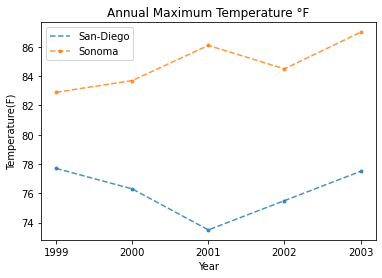

In [16]:
f, ax = plt.subplots()
for title, group in all_data.groupby('location'):
    group.groupby('location').plot(x = 'Year', y = 'annual_maximum_temp', 
                                  title = 'Annual Maximum Temperature °F', 
                                  label = title, 
                                  style = '.--', 
                                  ax = ax, 
                                  alpha = 0.8)
ax.set(xlabel = 'Year', ylabel = 'Temperature(F)', 
      xticks = range(1999, 2004))
plt.show()

## List comprehension
There are many pros and cons to consider when using list comprehension.
pros:
* Generally faster than for loops, especially for large datasets
* Less code to write 

cons:
* Less legible in certain situations
* Harder to implement for complicateed operations in for loops

In [18]:
%%time
#Time a cell using a for loop

for_list = []
for i in range(50000):
    for_list.append(i*i)
    
    

Wall time: 12 ms


In [19]:
%time
#Time a cell using list comprehension

comp_list = [i*i for i in range(50000)]

Wall time: 0 ns


### Modify values with list comprehension

In [20]:
avg_monthly_precip_in = [0.70, 0.75, 1.85, 2.93, 3.05, 2.02, 
                        1.93, 1.62, 1.84, 1.31, 1.39, 0.48]
# Convert each item in list from inch to mm
[precip_in*25.4 for precip_in in avg_monthly_precip_in]

[17.779999999999998,
 19.049999999999997,
 46.99,
 74.422,
 77.46999999999998,
 51.308,
 49.022,
 41.148,
 46.736,
 33.274,
 35.306,
 12.191999999999998]

### Apply a function to a list

In [22]:
def convert_in_to_mm (num):
    return num*25.4

[convert_in_to_mm(i) for i in avg_monthly_precip_in]

[17.779999999999998,
 19.049999999999997,
 46.99,
 74.422,
 77.46999999999998,
 51.308,
 49.022,
 41.148,
 46.736,
 33.274,
 35.306,
 12.191999999999998]

### Conditionals

In [23]:
[month for month in avg_monthly_precip_in if month > 1.5]

[1.85, 2.93, 3.05, 2.02, 1.93, 1.62, 1.84]

In [24]:
[month*(-2) if month > 1.5 else month*2 for month in avg_monthly_precip_in]

[1.4, 1.5, -3.7, -5.86, -6.1, -4.04, -3.86, -3.24, -3.68, 2.62, 2.78, 0.96]

## Loops exercises